In [1]:
import pandas as pd #to load and manipulate data and for one-hot encoding
import numpy as np #to calculate mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs

In [2]:
!pip install sklearn

In [3]:
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix #to create confusion matrix
from sklearn.metrics import plot_confusion_matrix #to draw a confusion matrix

## Import Data

We are going to use UCI machine learning repository and specifically heart-disease data set. Using a classification tree
we are going to predict whether a patient had a heart attack or not based on paramters like age, sex, blood pressure and some 
other metrics

In [4]:
df = pd.read_csv("processed.cleveland.data", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


"cp": chestpain, 
"restbp": resting blood pressre,
"chol": cholesterol,
"fbs": fasting blood sugar,
"restecg": resting electrocardio graphic results,
"thalach": maximum heart rate achieved,
"exang": exercise induced angina,
"oldpeak": ST depression induced by exercise ST segment,
"slope": the slope of peak exercise ST segment,
"ca": number of major vessels colored by fluroscopy,
"thal": thallium heart scan,
"hd": dignosis of heart disease, predicted attribute

In [6]:
#Replace the column numbers with column names to make sense of the data
df.columns = ["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]

In [7]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing data part 1: Identifying missing data

In [8]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Columns "ca" and "thal" having object as data type. Researching source material of this data we can identify that these columns are categorical variables which has floting point values for each category

In [9]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

"?" withing each column is missing value

In [11]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

#Other than these two columns all remianing columns do not have any missing values

## Missing data part 2: Dealing with missing data

In [12]:
len(df)

303

In [13]:
df_missing = df.loc[(df["ca"] == "?")|(df["thal"] == "?")]

In [14]:
df_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [15]:
len(df_missing)

6

In [16]:
#Since only 6 out of 303 rows have missing values, we can remove them instead of imputing.

In [17]:
df_non_missing = df.loc[(df["ca"] != "?")&(df["thal"] != "?")]

In [18]:
df_non_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [19]:
df_non_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [20]:
df_non_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [21]:
#Since both columns do not have any mising value, our data is ready to build Decision tree

## Dividing data based on dependent and independent variables

In [22]:
X = df_non_missing.drop(columns=["hd"], axis=1).copy()

In [23]:
y = df_non_missing["hd"].copy()

In [24]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [25]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## One Hot Encoding

Sci-kit Learn natively supports continuos data, it does not support categorical data as for independent variables.
The trick is to convert those categorical variables into multiple columns of binary values (0 or 1). This is called as
One Hot Encoding

In [26]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [27]:
for col in df_non_missing.columns:
    print(col)
    print(df_non_missing[col].unique())
    print("-"*70)

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
----------------------------------------------------------------------
sex
[1. 0.]
----------------------------------------------------------------------
cp
[1. 4. 3. 2.]
----------------------------------------------------------------------
restbp
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
----------------------------------------------------------------------
chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213.

Columns cp, restecg, slope, thal, sex and fbs should be treated as categorical variables, 
Thus they should be subject to one-hot encoding. But, as sex and fbs are already two-valued columns (0 or 1)
There is no need to subject both of these columns to one hot encoding

In [28]:
X = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])

In [29]:
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [30]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

For sake of simplicity lets divide the "hd" category only into two categories "Have heart disease" : 1 
and "Don't have heart disease": 0
Hence categories 1, 2, 3 and 4 can be collectively termed as catergory 1

In [31]:
have_hd = y>0

In [32]:
y[have_hd] = 1

In [33]:
y.unique()

array([0, 1], dtype=int64)

## Building preliminary classification tree

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
clt_dt = DecisionTreeClassifier(random_state=42)

In [36]:
clt_dt = clt_dt.fit(X_train, y_train)

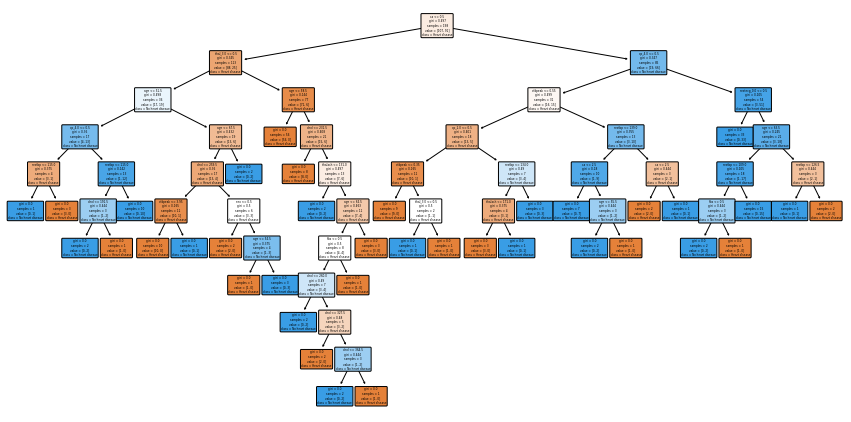

In [37]:
plt.figure(figsize=(15,7.5))
plot_tree(clt_dt, filled=True, rounded=True, class_names=["Heart disease","No heart disease"], feature_names=X.columns)
plt.show()

In [38]:
#Lets asses how this model performs with testing data set

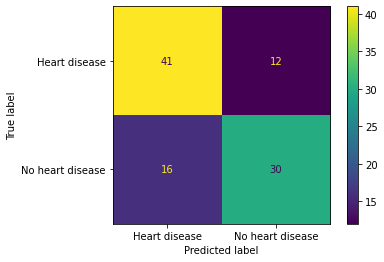

In [39]:
plot_confusion_matrix(clt_dt,X_test,y_test, display_labels=["Heart disease","No heart disease"])

Out of 53 people who had heart disease 41 (77.35%) were accurately predicted. 
Similarly out of 46 people who didn't have heart attack 30 (65.21%) were accurately predicted

We can improve this accuracy using methods like Cost complexity prunning (Weakest link prunning)

In [41]:
#The major task in prunning a tree is finding right value for prunning parameter called as alpha. 
#We extarct different values of alpha available that can be used for pruning

In [42]:
path = clt_dt.cost_complexity_pruning_path(X_train, y_train)

In [43]:
ccp_alphas = path.ccp_alphas

In [44]:
ccp_alphas = ccp_alphas[:-1]

In [45]:
ccp_alphas

array([0.        , 0.00454545, 0.00459137, 0.004662  , 0.00476992,
       0.00505051, 0.00550964, 0.0063599 , 0.00673401, 0.00692237,
       0.00748511, 0.00757576, 0.00757576, 0.00757576, 0.00787285,
       0.00974026, 0.00997712, 0.0105701 , 0.01065601, 0.01259347,
       0.01399744, 0.018264  , 0.01841548, 0.04219871, 0.05014482])

In [46]:
clf_dts = []

In [47]:
for ccp_alpha in ccp_alphas:
    clf_dt =  DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [48]:
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004545454545454547, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004591368227731865, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00466200466200466, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004769921436588104, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005050505050505051, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005509641873278234, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006359895248784139, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006734006734006734, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006922370558734195, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007485107485107483, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007575757575757576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007575757575757576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007575757575757576, random_state=0),
 DecisionTr

In [49]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

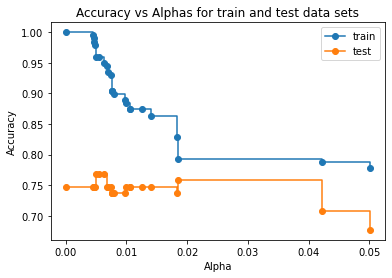

In [55]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alphas for train and test data sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [56]:
alpha_score_list =[]
for ccp_alpha in ccp_alphas:
    clt_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clt_dt, X_train, y_train, cv = 10)
    alpha_score_list.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [58]:
alpha_score_df = pd.DataFrame(data=alpha_score_list, columns=["alpha","mean","sd"])

In [59]:
alpha_score_df.head()

,alpha,mean,sd
0,0.000000,0.696053,0.103286
1,0.004545,0.696053,0.103286
2,0.004591,0.696053,0.103286
3,0.004662,0.696053,0.103286
4,0.004770,0.701053,0.102139


<AxesSubplot:xlabel='alpha'>

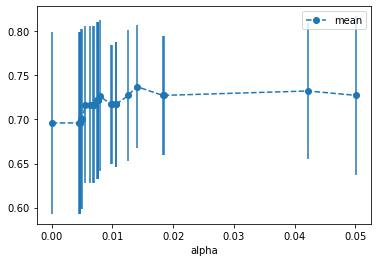

In [61]:
alpha_score_df.plot(x="alpha", y="mean", yerr="sd",marker="o", linestyle="--")

In [72]:
ideal_alpha = alpha_score_df[alpha_score_df["mean"] == max(alpha_score_df["mean"])]["alpha"].values[0]

In [73]:
ideal_alpha = round(ideal_alpha, 3)

In [74]:
ideal_alpha

0.014

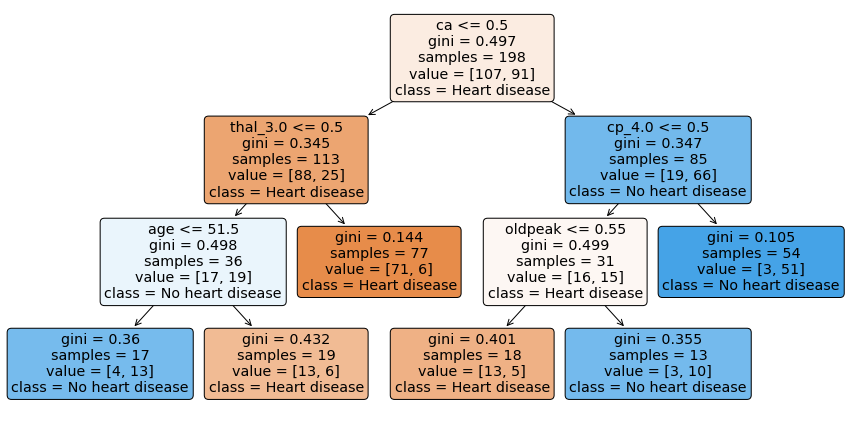

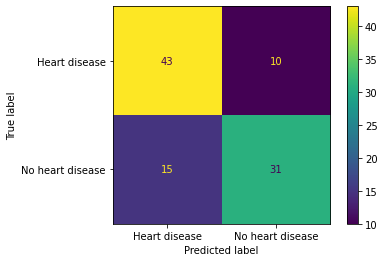

In [76]:
clt_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
clt_dt = clt_dt.fit(X_train, y_train)
plt.figure(figsize=(15,7.5))
plot_tree(clt_dt, filled=True, rounded=True, class_names=["Heart disease","No heart disease"], feature_names=X.columns)
plt.show()
plot_confusion_matrix(clt_dt,X_test,y_test, display_labels=["Heart disease","No heart disease"])

Out of 53 people who had heart disease 43 (81.13%) were accurately predicted. 
Similarly out of 46 people who didn't have heart attack 31 (67.39%) were accurately predicted